#Q2

##creating database

###imports

In [11]:
from numpy.random import uniform
from numpy import array

###create first data base with uniform dis

In [12]:
MAX_X1 = 2
MIN_X1 = 0
MAX_X2 = 1
MIN_X2 = -1
SAMPLE = 100
x1 = uniform(MIN_X1, MAX_X1 ,SAMPLE)
x2 = uniform(MIN_X2, MAX_X2 ,SAMPLE)
X =[];
for i in range(len(x1)):
   X.append([x1[i], x2[i]])
X1 =array(X)

###create second data base with uniform dis

In [13]:
MAX_X1 = 3
MIN_X1 = 1.75
MAX_X2 = 1
MIN_X2 = -1
SAMPLE = 100
x1 = uniform(MIN_X1, MAX_X1 ,SAMPLE)
x2 = uniform(MIN_X2, MAX_X2 ,SAMPLE)
X =[];
for i in range(len(x1)):
   X.append([x1[i], x2[i]])
X2 =array(X)

###create labels

In [14]:
from numpy import concatenate
SAMPLE = 100
Y=[];
for i in range(SAMPLE):
  Y.append(0)
for i in range(SAMPLE):
  Y.append(1)
Y =array(Y)
X =concatenate((X1,X2), axis=0)
#print(X)
#print(Y)

## Importing the libraries


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

## Splitting the dataset into the Training set and Test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


## Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting SVM to the Training set with diffrent C


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from numpy import mean
from numpy import std

best_C = 0
highest_mean_scores = 0
i=0.1

cv = KFold(n_splits=10, random_state=1, shuffle=True)



while(i < 50):
  classifier = SVC(C=i,kernel = 'linear', random_state = 0)
  classifier.fit(X_train, y_train)
  scores = cross_val_score(classifier, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
  print("C = %.1f" % i,'Accuracy: %.4f (the standard deviation : %.3f)' % (mean(scores), std(scores)))
  if(highest_mean_scores < mean(scores)):
      highest_mean_scores = mean(scores)
      best_C = i
  i += 0.1
print("best valume of C = ",best_C,"highest mean scores = ", highest_mean_scores)

C = 0.1 Accuracy: 0.9050 (the standard deviation : 0.079)
C = 0.2 Accuracy: 0.9050 (the standard deviation : 0.079)
C = 0.3 Accuracy: 0.9050 (the standard deviation : 0.079)
C = 0.4 Accuracy: 0.9200 (the standard deviation : 0.051)
C = 0.5 Accuracy: 0.9300 (the standard deviation : 0.051)
C = 0.6 Accuracy: 0.9300 (the standard deviation : 0.051)
C = 0.7 Accuracy: 0.9200 (the standard deviation : 0.040)
C = 0.8 Accuracy: 0.9200 (the standard deviation : 0.046)
C = 0.9 Accuracy: 0.9100 (the standard deviation : 0.049)
C = 1.0 Accuracy: 0.9200 (the standard deviation : 0.051)
C = 1.1 Accuracy: 0.9200 (the standard deviation : 0.051)
C = 1.2 Accuracy: 0.9350 (the standard deviation : 0.050)
C = 1.3 Accuracy: 0.9300 (the standard deviation : 0.051)
C = 1.4 Accuracy: 0.9300 (the standard deviation : 0.051)
C = 1.5 Accuracy: 0.9350 (the standard deviation : 0.055)
C = 1.6 Accuracy: 0.9350 (the standard deviation : 0.055)
C = 1.7 Accuracy: 0.9300 (the standard deviation : 0.056)
C = 1.8 Accura

## Fitting SVM to the Training set with choosen C


In [ ]:
classifier = SVC(C=best_C,kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=2.600000000000001, kernel='linear', random_state=0)

## Predicting the Test set results


In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix and score


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix :")
print(cm)
print(' accuracy_score =  %.3f    precision_score =  %.3f   recall_score =   %.3f '
       %(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred)))

confusion matrix :
[[19  4]
 [ 2 25]]
 accuracy_score =  0.880    precision_score =  0.862   recall_score =   0.926 


## Visualising the Training set results


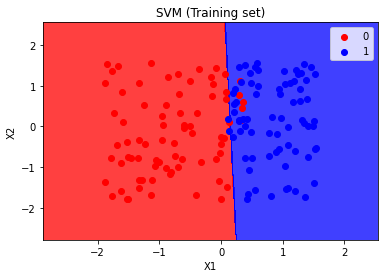

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Visualising the Test set results


In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (te1st set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'